### Simulate Dataset 

In [13]:
detach("package:SCOUT", unload=TRUE)
library(SCOUT)
library(ComplexHeatmap)
library(ggtree)

ggtree v3.14.0 Learn more at https://yulab-smu.top/contribution-tree-data/

Please cite:

S Xu, Z Dai, P Guo, X Fu, S Liu, L Zhou, W Tang, T Feng, M Chen, L
Zhan, T Wu, E Hu, Y Jiang, X Bo, G Yu. ggtreeExtra: Compact
visualization of richly annotated phylogenetic data. Molecular Biology
and Evolution. 2021, 38(9):4039-4042. doi: 10.1093/molbev/msab166



**OU Process**   
$ X(t) = \alpha[\theta - X(t)] + \sigma dW(t) $

**

In [9]:
sim.res <- simulate_test_data(ngenes = 30, # number of genes to simulat per regime.  
                              ncells = 128, # number of cells to simulate. # genes < # cells 
                              tree ='((t3:1, t4:1):1);', # cell state tree 
                              outdir = './simulate_data', # output directory 
                              out_prefix = 'sim_test', # prefix for output files 
                              a = c(0.5, 1, 1.5), # alpha parameters to simulate
                              s = c(0.1, 0.5, 1), # sigma parameters to simulate 
                              t0 = 3,  # initial theta value for OUwie.sim 
                              theta_step = 1, # for multiple theta values, how offset should the different regimes be. 
                              nevfs = 10) # number of EVFs to generate (for SymSim pipeline)

2025-11-14 15:09:01.093873 | Generating scLT data for 128 cells.

2025-11-14 15:09:01.095578 | Files will be saved to ./simulate_data.



Directory already exists: ./simulate_data 


Warning message in cbind(...):
“number of rows of result is not a multiple of vector length (arg 3)”
2025-11-14 15:09:43.659915 | Simulating OU genes for 9 parameter combinations.

2025-11-14 15:09:53.716643 | Data generation complete



In [10]:
names(sim.res)
names(sim.res$simulated_OU)
names(sim.res$scLT)

[1] "scLT"         "simulated_OU"

[1] "counts" "evfs"

[1] "tree"            "observed_counts" "meta"            "states"

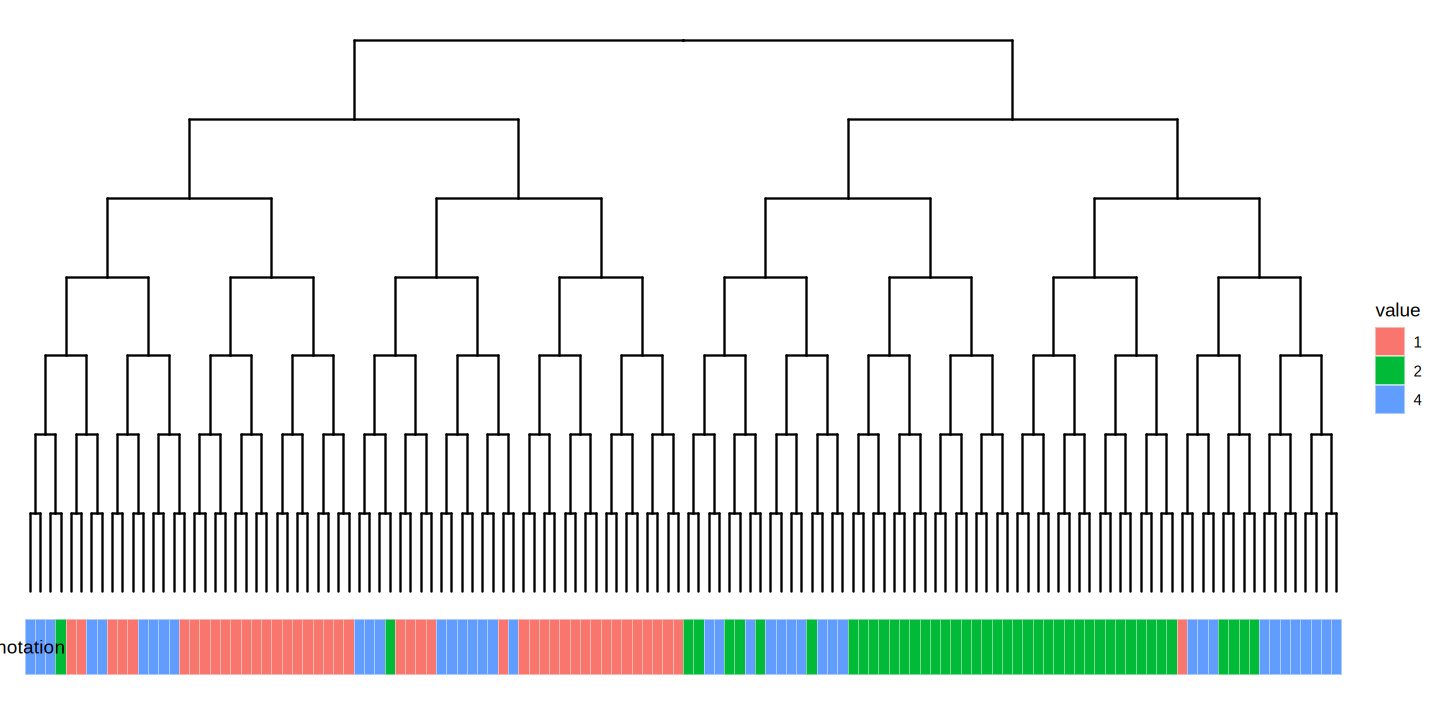

In [23]:
### Simulated Tree with State Annotations 

options(repr.plot.width = 12, repr.plot.height=6)
meta <- sim.res$scLT$meta
annotation <- as.factor(meta$cluster); names(annotation) <- meta$nodeID
p<-ggtree(sim.res$scLT$tree) + layout_dendrogram()
gheatmap(p, data.frame(annotation), width = 0.1)

In [24]:
### Simulated OU-Gene Expression

head(sim.res$simulated_OU$counts[[1]])

,BM1_1,BM1_2,BM1_3,BM1_4,BM1_5,BM1_6,BM1_7,BM1_8,BM1_9,BM1_10,⋯,OUM_23,OUM_24,OUM_25,OUM_26,OUM_27,OUM_28,OUM_29,OUM_30,OUM,species
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<chr>
1,1476,146,32,579,0,2985,186,494,0,27,⋯,570,373,311,405,686,3,25,54,4,t1
2,1693,52,63,509,1,3172,204,528,0,8,⋯,498,489,324,500,392,0,22,1,4,t2
3,1225,174,34,582,1,2781,874,513,0,25,⋯,276,297,261,526,1041,0,69,23,4,t3
4,1291,14,112,574,0,3155,363,500,0,18,⋯,396,264,220,326,847,0,4,337,2,t4
5,258,766,69,595,10,1458,141,728,13,15,⋯,345,182,125,629,685,0,1,116,1,t5
6,224,0,45,644,6,1435,69,96,0,25,⋯,126,244,143,445,582,5,241,8,1,t6
